In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [2]:
df = pd.read_csv("Data.csv")
print(df.head())

   Zip Code  Beds Baths  Living Space     State  Zip Code Population  \
0     10013   2.0     3        1967.0  New York                29563   
1     10013   2.0     3        1967.0  New York                29563   
2     10014   1.0     1         718.0  New York                29815   
3     10014   3.0     2        1538.0  New York                29815   
4     10014   1.0     1         600.0  New York                29815   

   Median Household Income      Price  
0                   370046  3999000.0  
1                   370046  3999000.0  
2                   249880  1650000.0  
3                   249880   760000.0  
4                   249880  1100000.0  


In [3]:
df.isnull()

,Zip Code,Beds,Baths,Living Space,State,Zip Code Population,Median Household Income,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9329,False,False,False,False,False,False,False,False
9330,False,False,False,False,False,False,False,False
9331,False,False,False,False,False,False,False,False
9332,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Zip Code                     0
Beds                       110
Baths                      122
Living Space               126
State                        0
Zip Code Population          0
Median Household Income      0
Price                        1
dtype: int64

In [5]:
imputer = SimpleImputer(strategy='median')
df["Beds"] = imputer.fit_transform(df[["Beds"]])

In [6]:
df["Beds"].isna().sum()

0

In [7]:
df["Baths"].unique()

array(['3', '1', '2', nan, '10', '4', '5', '9', '6', '11', '8', '7', '12',
       ' ', '24'], dtype=object)

In [8]:

df["Baths"] = pd.to_numeric(df["Baths"], errors="coerce")

In [9]:
imputer = SimpleImputer(strategy='median')
df["Baths"] = imputer.fit_transform(df[["Baths"]])

In [10]:
imputer = SimpleImputer(strategy='median')
df["Living Space"] = imputer.fit_transform(df[["Living Space"]])

In [11]:
imputer = SimpleImputer(strategy='median')
df["Price"] = imputer.fit_transform(df[["Price"]])

In [12]:
df.isnull().sum()

Zip Code                   0
Beds                       0
Baths                      0
Living Space               0
State                      0
Zip Code Population        0
Median Household Income    0
Price                      0
dtype: int64

In [13]:
df

,Zip Code,Beds,Baths,Living Space,State,Zip Code Population,Median Household Income,Price
0,10013,2.0,3.0,1967.0,New York,29563,370046,3999000.0
1,10013,2.0,3.0,1967.0,New York,29563,370046,3999000.0
2,10014,1.0,1.0,718.0,New York,29815,249880,1650000.0
3,10014,3.0,2.0,1538.0,New York,29815,249880,760000.0
4,10014,1.0,1.0,600.0,New York,29815,249880,1100000.0
...,...,...,...,...,...,...,...,...
9329,38119,3.0,2.0,1400.0,Tennessee,24027,119005,299900.0
9330,38119,2.0,3.0,1200.0,Tennessee,24027,119005,199000.0
9331,38119,3.0,2.0,2000.0,Tennessee,24027,119005,310000.0
9332,38119,2.0,3.0,1200.0,Tennessee,24027,119005,159900.0


In [14]:
df

,Zip Code,Beds,Baths,Living Space,State,Zip Code Population,Median Household Income,Price
0,10013,2.0,3.0,1967.0,New York,29563,370046,3999000.0
1,10013,2.0,3.0,1967.0,New York,29563,370046,3999000.0
2,10014,1.0,1.0,718.0,New York,29815,249880,1650000.0
3,10014,3.0,2.0,1538.0,New York,29815,249880,760000.0
4,10014,1.0,1.0,600.0,New York,29815,249880,1100000.0
...,...,...,...,...,...,...,...,...
9329,38119,3.0,2.0,1400.0,Tennessee,24027,119005,299900.0
9330,38119,2.0,3.0,1200.0,Tennessee,24027,119005,199000.0
9331,38119,3.0,2.0,2000.0,Tennessee,24027,119005,310000.0
9332,38119,2.0,3.0,1200.0,Tennessee,24027,119005,159900.0


In [15]:
df["State"].unique()

array(['New York', 'Pennsylvania', 'District of Columbia', 'Maryland',
       'Virginia', 'North Carolina', 'Georgia', 'Florida', 'Tennessee'],
      dtype=object)

In [16]:
for column in df[["Beds","Living Space","Baths","Zip Code Population"]]:
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.median(df[column]), df[column])

In [17]:
encoder = ce.OneHotEncoder(cols=['State'], use_cat_names=True)

In [18]:
df_encoded=encoder.fit_transform(df)

In [19]:
df_encoded

,Zip Code,Beds,Baths,Living Space,State_New York,State_Pennsylvania,State_District of Columbia,State_Maryland,State_Virginia,State_North Carolina,State_Georgia,State_Florida,State_Tennessee,Zip Code Population,Median Household Income,Price
0,10013,2.0,3.0,1967.0,1,0,0,0,0,0,0,0,0,29563.0,370046,3999000.0
1,10013,2.0,3.0,1967.0,1,0,0,0,0,0,0,0,0,29563.0,370046,3999000.0
2,10014,1.0,1.0,718.0,1,0,0,0,0,0,0,0,0,29815.0,249880,1650000.0
3,10014,3.0,2.0,1538.0,1,0,0,0,0,0,0,0,0,29815.0,249880,760000.0
4,10014,1.0,1.0,600.0,1,0,0,0,0,0,0,0,0,29815.0,249880,1100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,38119,3.0,2.0,1400.0,0,0,0,0,0,0,0,0,1,24027.0,119005,299900.0
9330,38119,2.0,3.0,1200.0,0,0,0,0,0,0,0,0,1,24027.0,119005,199000.0
9331,38119,3.0,2.0,2000.0,0,0,0,0,0,0,0,0,1,24027.0,119005,310000.0
9332,38119,2.0,3.0,1200.0,0,0,0,0,0,0,0,0,1,24027.0,119005,159900.0


In [20]:
X = df_encoded.iloc[:, :-1].values  
Y = df_encoded.iloc[:, -1].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X_train

array([[1.91470e+04, 3.00000e+00, 4.00000e+00, ..., 0.00000e+00,
        3.93350e+04, 1.54389e+05],
       [3.72120e+04, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        2.09170e+04, 1.78515e+05],
       [2.12310e+04, 2.00000e+00, 3.00000e+00, ..., 0.00000e+00,
        1.57460e+04, 1.15116e+05],
       ...,
       [2.82690e+04, 2.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        7.83530e+04, 9.49800e+04],
       [1.91300e+04, 5.00000e+00, 4.00000e+00, ..., 0.00000e+00,
        2.93780e+04, 1.38891e+05],
       [3.31260e+04, 2.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        4.81300e+04, 6.39100e+04]])

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[-1.06588848, -0.0863239 ,  1.86402273, ..., -0.41542949,
        -0.11914724,  0.9370174 ],
       [ 1.42462638, -1.91492126, -1.50774513, ...,  2.40714738,
        -1.10231868,  1.46603451],
       [-0.77857971, -1.00062258,  0.74010011, ..., -0.41542949,
        -1.37835188,  0.07586807],
       ...,
       [ 0.19170779, -1.00062258, -0.38382251, ..., -0.41542949,
         1.96367301, -0.36565927],
       [-1.06823217,  1.74227345,  1.86402273, ..., -0.41542949,
        -0.65066195,  0.59718871],
       [ 0.86131369, -1.00062258, -0.38382251, ..., -0.41542949,
         0.35033875, -1.04693927]])

In [25]:
Y.shape

(9334,)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test_scaled)
y_pred_train=model.predict(X_train_scaled)

In [29]:
df_encoded

,Zip Code,Beds,Baths,Living Space,State_New York,State_Pennsylvania,State_District of Columbia,State_Maryland,State_Virginia,State_North Carolina,State_Georgia,State_Florida,State_Tennessee,Zip Code Population,Median Household Income,Price
0,10013,2.0,3.0,1967.0,1,0,0,0,0,0,0,0,0,29563.0,370046,3999000.0
1,10013,2.0,3.0,1967.0,1,0,0,0,0,0,0,0,0,29563.0,370046,3999000.0
2,10014,1.0,1.0,718.0,1,0,0,0,0,0,0,0,0,29815.0,249880,1650000.0
3,10014,3.0,2.0,1538.0,1,0,0,0,0,0,0,0,0,29815.0,249880,760000.0
4,10014,1.0,1.0,600.0,1,0,0,0,0,0,0,0,0,29815.0,249880,1100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,38119,3.0,2.0,1400.0,0,0,0,0,0,0,0,0,1,24027.0,119005,299900.0
9330,38119,2.0,3.0,1200.0,0,0,0,0,0,0,0,0,1,24027.0,119005,199000.0
9331,38119,3.0,2.0,2000.0,0,0,0,0,0,0,0,0,1,24027.0,119005,310000.0
9332,38119,2.0,3.0,1200.0,0,0,0,0,0,0,0,0,1,24027.0,119005,159900.0


In [30]:
print(model.predict(scaler.transform([[38119,1,5,2200,1,0,0,0,0,0,0,0,0,29815,300005]])))


[11063769.46144326]


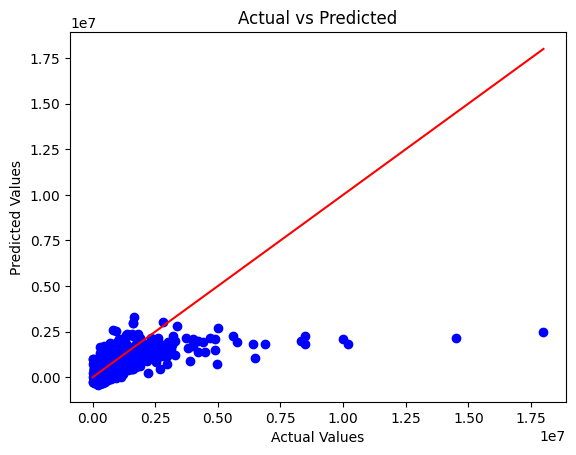

In [31]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

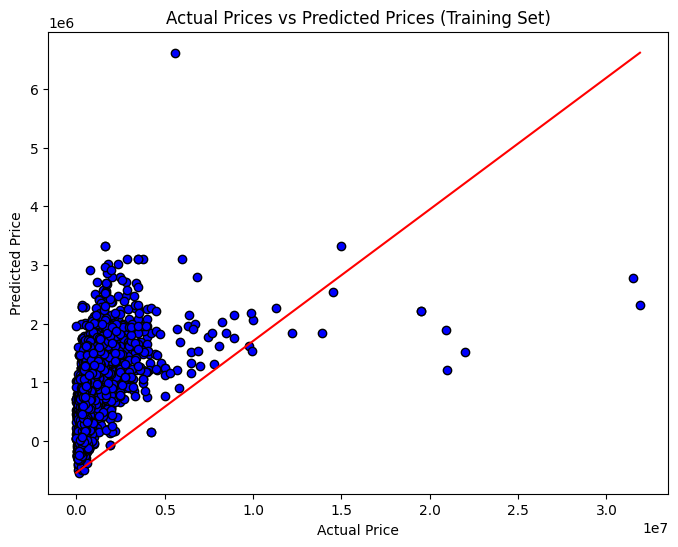

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', edgecolor='black')
plt.plot([min(y_train), max(y_train)], [min(y_pred_train), max(y_pred_train)],  color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices (Training Set)')
plt.show()


In [33]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.29102292063162294


In [34]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 374433.6735867982


In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 798520.72617919


Decision Tree

In [36]:
modeld = DecisionTreeRegressor(random_state=42)
modeld.fit(X_train_scaled, y_train)
y_pred = modeld.predict(X_test_scaled)
y_pred_train=modeld.predict(X_train_scaled)


In [37]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.45715110860169217


In [38]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 225320.00705791562


In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 698730.2945051981


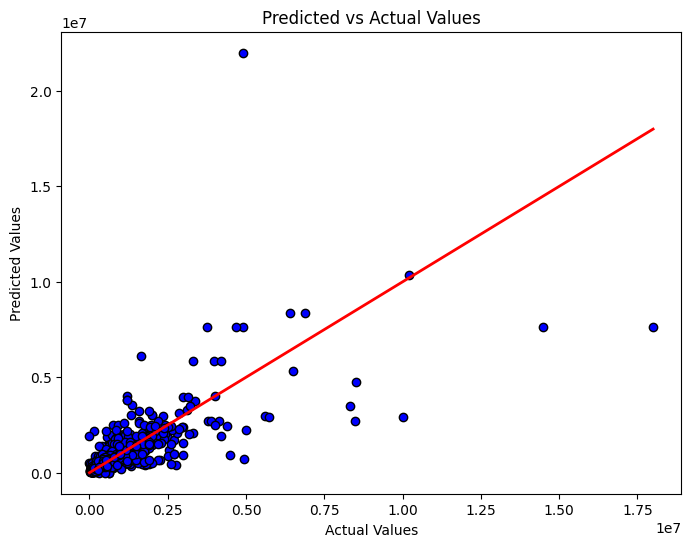

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

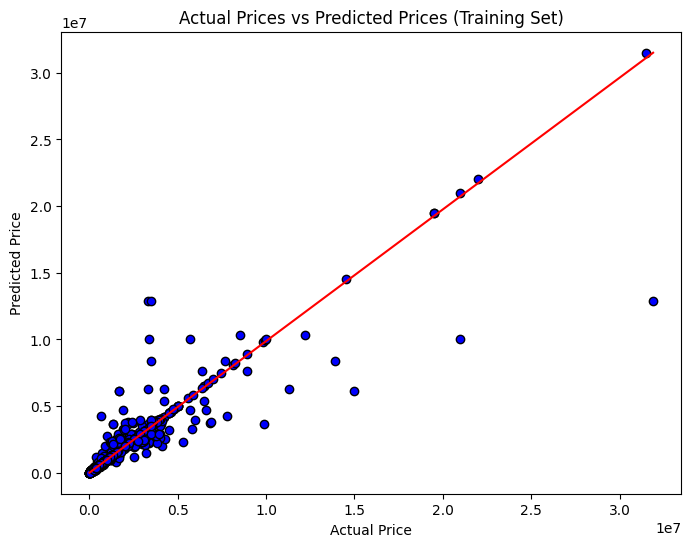

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', edgecolor='black')
plt.plot([min(y_train), max(y_train)], [min(y_pred_train), max(y_pred_train)],  color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices (Training Set)')
plt.show()


RANDOM FOREST

In [42]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
np.random.seed(42)
X = np.random.rand(100, 5)  

In [44]:
y_pred = rf_model.predict(X_test)

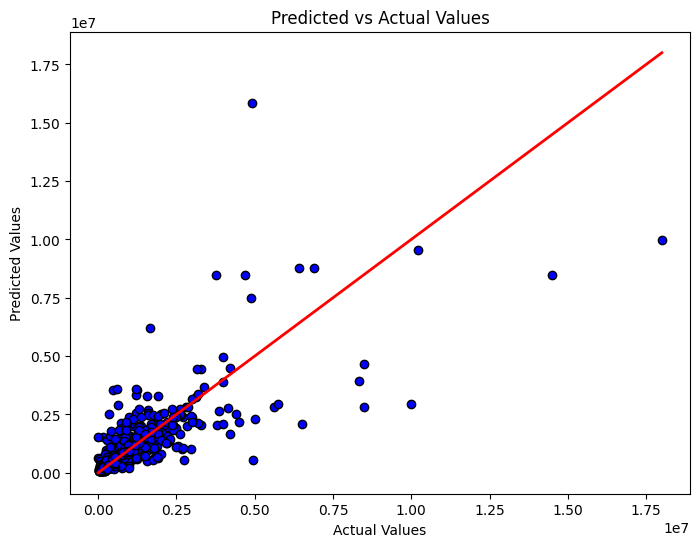

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2) 
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [46]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.5956856925533817


In [47]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 205163.9777277121


In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 603017.13155876


In [49]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=100, gamma=0.1)
model.fit(X_train_scaled, y_train)


SVR(C=100, gamma=0.1)

In [50]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.5956856925533817
